## Importing csv and Reading Raw Data

In [1]:
import pandas as pd
import re
import string
import nltk

pd.set_option('display.max_colwidth', 100)

ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

stopword = nltk.corpus.stopwords.words('english')

df = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
df.columns = ['label', 'email']

df.head()

,label,email
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


## Cleaning Dataframe E-mail(text)

In [2]:
def clean_text(text):
    
    ## Removing punctuation like ' !"#$%&\'()*+, '
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    
    ## Tokenizing the email text
    tokens = re.split('\W+', text)
    
    ## Removing Stopwords like 'he,him,is,a,for,the,as,but,do etc'
    text = [wn.lemmatize(word) for word in tokens if word not in stopword]
    return text

## Transforming the dataframe using Lambda fucntion
df['email_clean'] = df['email'].apply(lambda x: clean_text(x))
df.head()

,label,email,email_clean
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."


### Converting Raw Data (Email-text) to Vectors
    Using Count-Vectorizer & TF-IDF Vectorizer

#### Count-Vectorizer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(df['email'])

In [4]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8901,8902,8903,8904,8905,8906,8907,8908,8909,8910
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TF-IDF Vectorizer

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(df['email'])

In [6]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8901,8902,8903,8904,8905,8906,8907,8908,8909,8910
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Engineering

In [7]:
import string

def punct_count(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

df['email_len'] = df['email'].apply(lambda x: len(x) - x.count(" "))
df["%punct"] = df['email'].apply(lambda x: punct_count(x))
df.head()

,label,email,email_clean,email_len,%punct
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, go, usf, life, around, though]",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]",62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre...",135,4.4


### Feature Evaluation

In [15]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

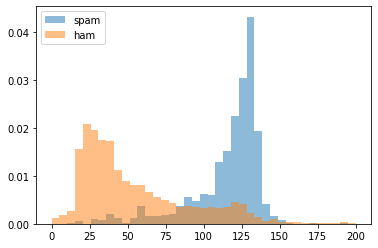

In [25]:
bins = np.linspace(0, 200, 40)

pyplot.hist(df[df['label']=='spam']['email_len'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(df[df['label']=='ham']['email_len'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

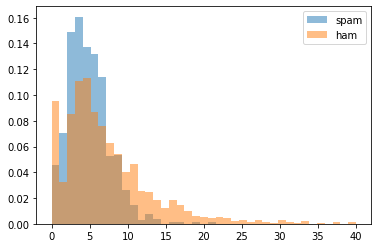

In [29]:
bins = np.linspace(0, 40, 40)

pyplot.hist(df[df['label']=='spam']['%punct'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(df[df['label']=='ham']['%punct'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

### Creating a Feature Dataframe out of original df(DataFrame) for Model Building

In [8]:
X_features = pd.concat([df['email_len'], df['%punct'], X_tfidf_df], axis=1)
X_features.head()

,email_len,%punct,0,1,2,3,4,5,6,7,...,8901,8902,8903,8904,8905,8906,8907,8908,8909,8910
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Random Forest Classifier Through Cross-Validation 

In [9]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [10]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, df['label'], cv = k_fold, scoring='accuracy', n_jobs=-1)

array([0.96678636, 0.97127469, 0.9703504 , 0.95687332, 0.96855346])

### Exploring Random Forest Classifier through Holdout Set (Train Test Split)

In [11]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_features, df['label'], test_size=0.3)

In [17]:
rf1 = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf1_model = rf1.fit(X_train, y_train)

In [18]:
y_pred = rf1_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

In [19]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred), 3)))

Precision: 1.0 / Recall: 0.565 / Accuracy: 0.942
